# What makes people in a country happy?

# What we did
David Lau - EDA, Data Cleaning, Merging, Demo, Project Report

TingYue Dong - Modeling and Question Answering, Demo, Project Report



# Cleaning

## Imports

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Data Munging

In [14]:
year2015 = pd.read_csv('./data/2015.csv')
year2016 = pd.read_csv('./data/2016.csv')
year2017 = pd.read_csv('./data/2017.csv')
year2018 = pd.read_csv('./data/2018.csv')
year2019 = pd.read_csv('./data/2019.csv')

year2015['year'] = '2015'
year2016['year'] = '2016'
year2017['year'] = '2017'
year2018['year'] = '2018'
year2019['year'] = '2019'
year2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [15]:
data = pd.concat([year2015, year2016,year2017,year2018,year2019])
data.set_index(data['year'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
year,,,,,,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025


In [41]:
df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')
#remove . columns and then rename columns to a standard name and add year column
def standardize_columns(df, year):
    df.columns = df.columns.str.replace('.', ' ').str.strip()
    df.rename(columns=standard_columns, inplace=True)
    df['Year'] = year 
    return df
standard_columns = {
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Economy  GDP per Capita': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Family': 'Social Support',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy Life Expectancy',
    'Health  Life Expectancy': 'Healthy Life Expectancy',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Freedom': 'Freedom to Make Life Choices',
    'Freedom to make life choices': 'Freedom to Make Life Choices',
    'Trust (Government Corruption)': 'Perceptions of Corruption',
    'Trust  Government Corruption': 'Perceptions of Corruption',
    'Perceptions of corruption': 'Perceptions of Corruption',
}
df_2015 = standardize_columns(df_2015,2015)
df_2016 = standardize_columns(df_2016,2016)
df_2017 = standardize_columns(df_2017,2017)
df_2018 = standardize_columns(df_2018,2018)
df_2019 = standardize_columns(df_2019,2019)
#remove columns that are not common to all dataframes
common_cols = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
               'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity', 'Year']
df_2015 = df_2015[common_cols]
df_2016 = df_2016[common_cols]
df_2017 = df_2017[common_cols]
df_2018 = df_2018[common_cols]
df_2019 = df_2019[common_cols]
#concatenate all dataframes
df_merged = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)
#fill missing values with the mean of the column
for column in common_cols[1:-1]:
    if df_merged[column].isnull().any():
        df_merged[column].fillna(df_merged[column].mean(), inplace=True)
#round all columns to 3 decimal places
for column in common_cols[1:]:  
    df_merged[column] = df_merged[column].round(3)
df_merged

,Country,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity,Year
0,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2015
1,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2015
2,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2015
3,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2015
4,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2015
...,...,...,...,...,...,...,...,...,...,...
621,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,2018
622,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,2018
623,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018
624,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2018


To clean and merge the data first we read in the csv for the years of the data that we are gonna use as our training set which is 2015-2018. After we can see that several issues, first is the different naming conventions for each column of the datasets for different years. Mainly the 2017 one has the most since spaces are replaced with . and there are quotes around each title as well. There are also some changes to the other ones like country vs country or region. So to combat all this we take our dataframe and first remove the . and replace with spaces to strip. Then we rename columns to a standard name that we will be using for our data and each different name is matched to the unique ones. Next, we tag the year of the dataset to be able to idenetify which year we got it from. We then take only the common rows that all the datasets have and keep those while dropping year unique ones because it won't make sense to generate fake data for the years where that column doesn't exist. Lastly we combine the data, replace missing values with the mean for the column (mean imputation), and round everything to the thousandth for a standard decimal place.

## EDA

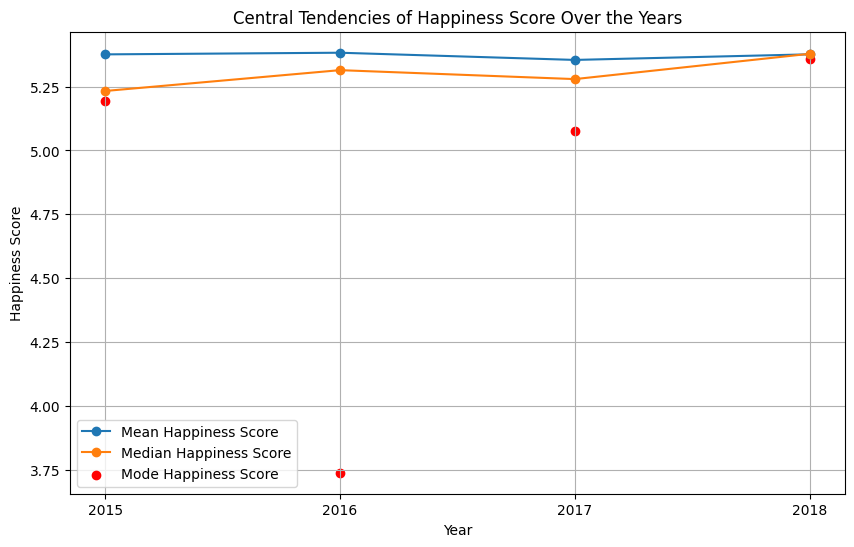

In [17]:
#aggregate the data by mean, median and mode and plot
ct = df_merged.groupby('Year')['Happiness Score'].agg(
    mean='mean', 
    median='median', 
    mode=lambda x: x.mode()[0]
)
plt.figure(figsize=(10, 6))
plt.plot(ct.index, ct['mean'], marker='o', label='Mean Happiness Score')
plt.plot(ct.index, ct['median'],  marker='o', label='Median Happiness Score')
plt.scatter(ct.index, ct['mode'], color='red', label='Mode Happiness Score')
plt.xticks(ct.index, labels=[year for year in ct.index])
plt.title('Central Tendencies of Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

Based on the graph of the central tendencies of happiness over the years, we can see that the mean and median stay close. The mode for 2016 had a firm drop and more variability which makes sense since it represents the most frequently occuring happiness score. This could mean a more wide spread of data or simply less overlapping scores that year. We also note that there is a general upwards trend with 2018 being a high for most of the data points meaning there is a happiness increase throughout the years.

In [18]:
rankings_pivot = df_merged.pivot(index='Country', columns='Year', values='Happiness Rank')
#calculate the average change in ranking for each country and take the absolute value
ranking_changes = rankings_pivot.diff(axis=1)
stability = ranking_changes.abs().mean(axis=1)
#find the countries that have a stability changes less than 2
stable_countries = stability[stability < 2].index.tolist()  
#find the countries that have improved their ranking based on the average change   
average_change = ranking_changes.mean(axis=1)
improved_countries = average_change[average_change < 0].index.tolist()
print("Stable Countries:", stable_countries)
print("Countries that Improved Their Ranking:", improved_countries)

Stable Countries: ['Australia', 'Austria', 'Belgium', 'Belize', 'Burundi', 'Canada', 'Central African Republic', 'Costa Rica', 'Denmark', 'Finland', 'Iceland', 'Iraq', 'Italy', 'Netherlands', 'New Zealand', 'Norway', 'Rwanda', 'Suriname', 'Sweden', 'Switzerland']
Countries that Improved Their Ranking: ['Afghanistan', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Chile', 'Comoros', 'Congo (Brazzaville)', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Iran', 'Ireland', 'Italy', 'Ivory Coast', 'Jamaica', 'Kenya', 'Kosovo', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 

To find our stable countries we find the ranking changes over the years then taking the absolute mean we calculate the mean changes throughout the years. Changes of less than 2 aren't significant so we used that as our threshold and counted every country with less than 2 change in ranking as stable. For countries that improved we do something similar except we don't take the absolute value so we can identify countries with a negative change in ranking (since in ranking 1 is good and higher is worse a negative change means improvement, ie rank 200->rank 1 is a -199 change) then that list is the countries that improved their ranking.

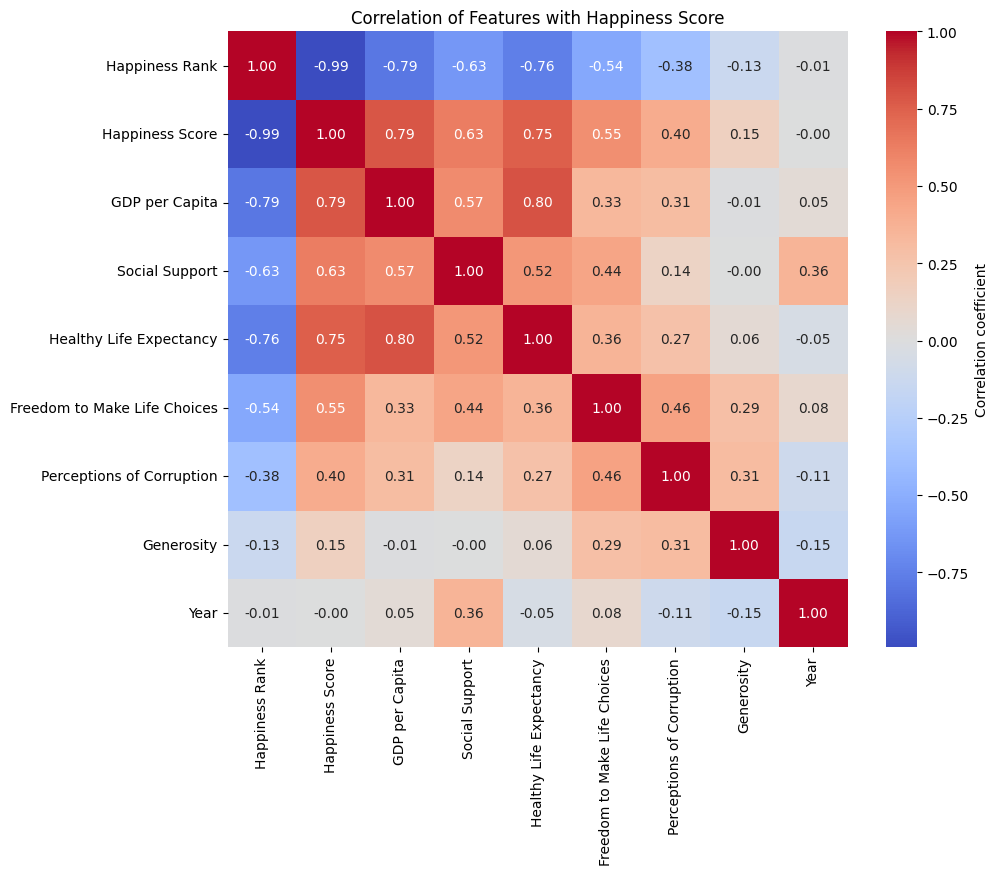

In [19]:
#only select the numerical columns
numeric_data = df_merged.select_dtypes(include=[np.number])
#plot the correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation of Features with Happiness Score')
plt.show()

Using a correlation matrix we can view the correlation between every attribute which is helpful in identifying what actually correlate to happiness and other attributes. Taking a look we can see that GDP, Social Support, Life Expectancy, Freedom all have strong correlation with happiness score. This makes sense because those aspects all contribute to a healthy functioning society. If I were the president and provided the data, I would work on social services to provide for citizens since if you take a look at social services it also has strong correlation to the other features of Life Expectancy, Freedom, etc. So building up social services would cause those other attributes to go up as well due to their relation. One thing to note is the almost perfectly negative correlation between happiness ranking and happiness value. This is actually expected since as happiness value goes up the ranking go down since for ranking 1 means high happiness while for value the higher the number the better. Below I've also plotted scatter plots for each individual feature vs the happiness score, which further shows the positive correlation of the different features on the happiness score.


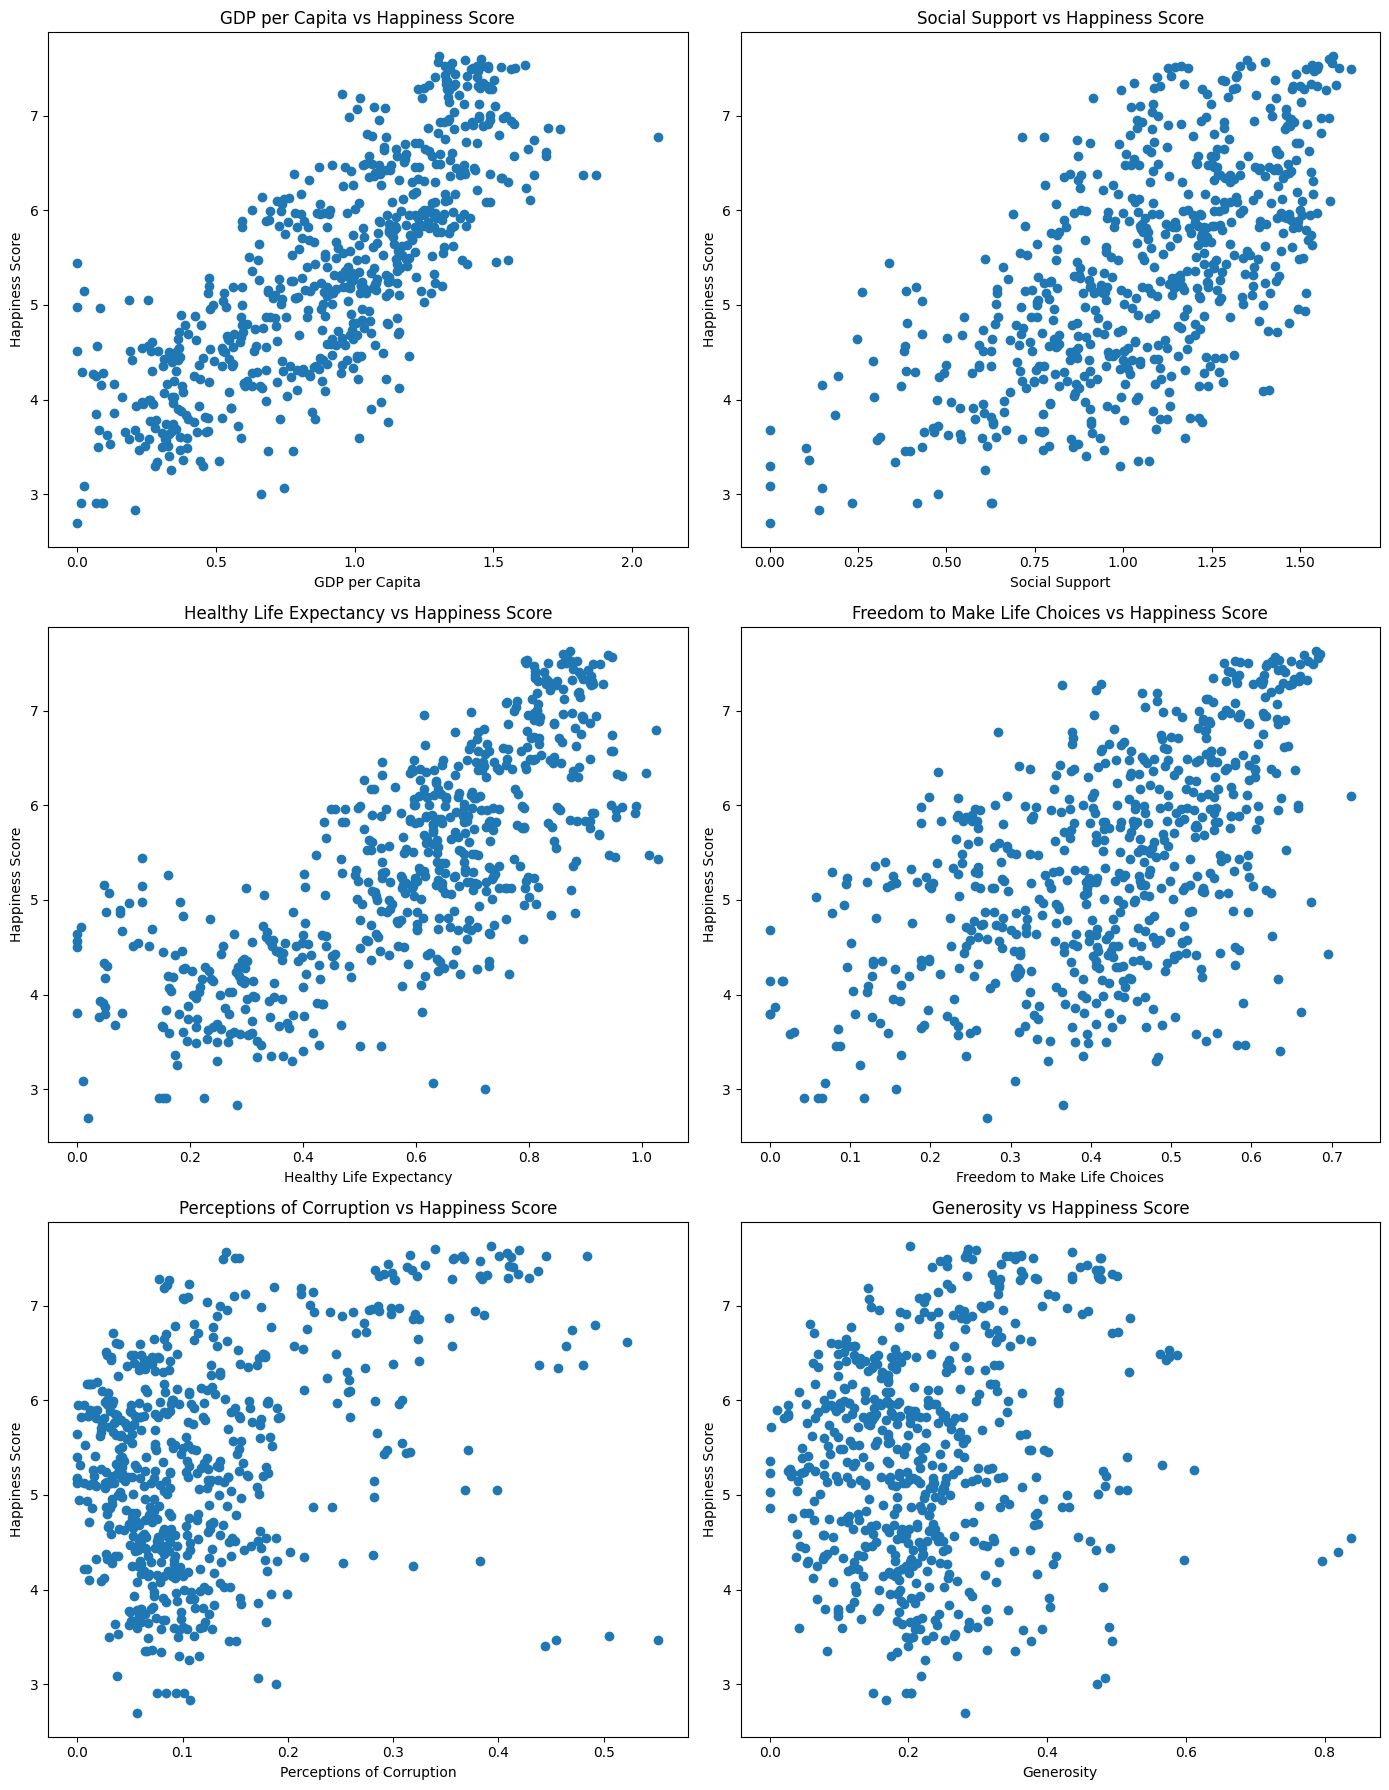

In [105]:
#select the features to plot
features = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity']
titles = ['GDP per Capita vs Happiness Score', 'Social Support vs Happiness Score', 'Healthy Life Expectancy vs Happiness Score', 'Freedom to Make Life Choices vs Happiness Score', 'Perceptions of Corruption vs Happiness Score', 'Generosity vs Happiness Score']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()
#plot the scatter plots for each feature
for i, feature in enumerate(features):
    axes[i].scatter(df_merged[feature], df_merged['Happiness Score'])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Happiness Score')
fig.tight_layout()
plt.show()


## Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import plot_tree


### Linear Regression

Our first model is Linear Regression, which is a model that attemps to find the best linear line that fits the data. The general equation is y = B_0 + B1x + B2x + ... + error. Where y is the target variable, and x are the features. In Linear regression we want to find the best betas that will give the best fitted line. To find the best fitted line, we want to find such line that minimizes the sum of squared differences between the true and the predicted value. Once we train the model that minizes the loss, we then use this model to predict the test target variable, given test feature variables. 

In [118]:
X_train = df_merged[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_train = df_merged['Happiness Rank']
X_test = df_2019[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_test = df_2019[['Happiness Rank']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [136]:
model = LinearRegression()

model.fit(X_train, y_train) 
scores = cross_val_score(model, X_train, y_train, cv=5) 
print("Cross-validated scores:", scores)


y_val_pred_LR = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred_LR)
r2 = r2_score(y_val, y_val_pred_LR)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'R^2 Score on Validation Set: {r2}')

y_test_pred_LR = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred_LR)
r2_test = r2_score(y_test, y_test_pred_LR)
print(y_test_pred_LR)
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R^2 Score on Test Set: {r2_test}')


LinearRegression()
Cross-validated scores: [0.80240671 0.82918978 0.75309018 0.66341016 0.77979183]
Mean Squared Error on Validation Set: 582.1433702929033
R^2 Score on Validation Set: 0.6908803806772552
[ 18.47812446  15.10942214   9.38586228  17.23254796  19.51778593
  13.61916702  18.7526788   17.84673928  18.42129351  25.24751903
  18.2021556   46.37374938  42.05778599  14.12539562  28.28542708
  16.47313083  28.39828859  31.46001448  35.56527117  44.88693407
  29.86087552  25.81799278  61.64129881  34.79328783  44.82726525
  57.01162387  72.69470966  46.9903027   23.23754803  41.36141971
  47.31844447  65.30161457  45.79403191   5.00035649  79.36989469
  50.55225758  37.55703181  53.7079892   52.36854824  47.95924276
  55.30466361  59.41017089  61.79620501  34.72527732  76.2829821
  72.78737857  54.71675311  61.63341407  49.23783511  63.82625393
  40.07801534  50.95073294  64.18573042  62.36632898  41.2746582
  65.70178503  54.13382242  35.47159358  77.88229295  56.7358051
  79.60

In [143]:
# Print the coefficients and intercept
coefficients = [-44.13716883, -31.7707192, -42.76625557, -58.85142688, -21.35829804, -13.73986073, 3.11418706]
intercept = -6071.76262540844
x_values = np.linspace(-10, 10, 100)

y_values = intercept + np.dot(coefficients, x_values.reshape(1, -1))

plt.plot(x_values, y_values.T, color='red', label='Line')


NameError: name 'coefs' is not defined

### Random Forest

Our second model is a a Random Forest. Random forest is a combination of multiple decision tree. Each tree in the forest is built from a random sample from the training data. In building each tree, it randomly selects a subset of feature at each split which help improve model accuracry. To ensure randomness, it uses bootstraping, where it takes the sample randomly, and other decision tree is still able to access it(often known as sampling with replacement). The ouput of the tree will be the average of the ouputs by the individual tree.

In [111]:
X_train = df_merged[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_train = df_merged['Happiness Rank']
X_test = df_2019[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_test = df_2019[['Happiness Rank']]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Mean Squared Error on Validation Set: 599.8678789391447
R^2 Score on Validation Set: 0.6814686212293171
Cross-validated scores: [0.75689772 0.81408045 0.75691057 0.71988066 0.77122913]
[ 23.47182607  20.56432942  19.51981429  22.60394789  22.57273783
  20.11649285  19.90744467  18.55869537  18.82796957  30.49292845
  22.38928337  63.60510631  47.28774394  32.9759461   39.92250768
  30.67778029  34.00542612  39.47937446  40.40775793  47.95902275
  20.25980509  20.90259538  60.02484766  42.26713045  47.93741539
  60.54953603  69.73897164  42.33793445  25.05155871  48.70775608
  47.25346576  82.83827682  44.03747768  23.53385675  72.45919666
  55.1575566   28.73927405  55.30070408  45.42823742  46.56640077
  68.84275145  61.3775517   69.8027791   33.39623879  72.45919666
  69.73897164  53.63417941  50.32562023  48.13909527  69.13074098
  38.6101173   60.02271319  63.25879882  55.30806454  40.07787132
  69.73897164  46.04609189  42.3986783   69.73897164  50.60718162
  69.73897164  63.92752

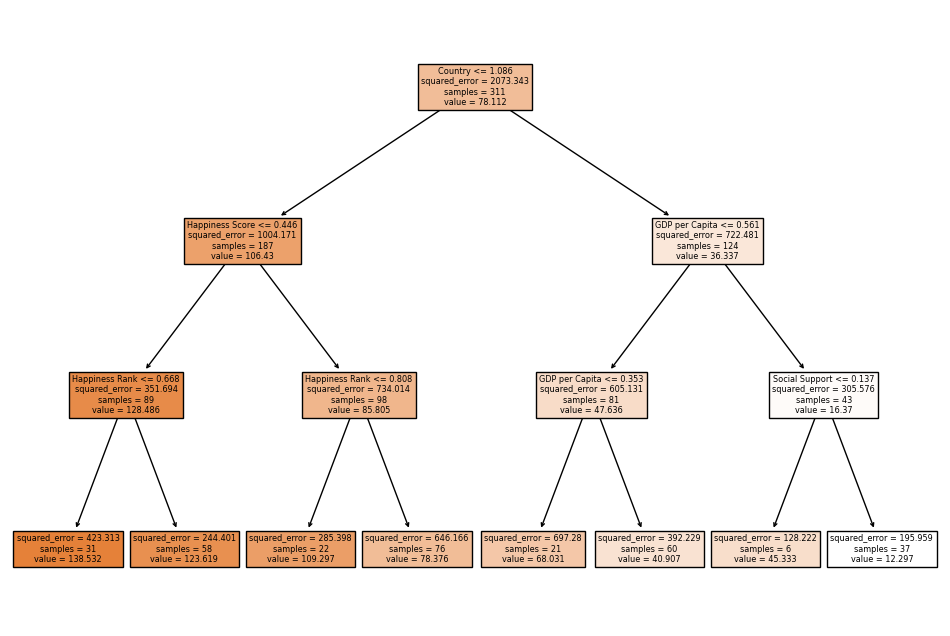

In [114]:
model_RF = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=3)

model_RF.fit(X_train, y_train)

y_val_pred_RF = model_RF.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred_RF)
r2 = r2_score(y_val, y_val_pred_RF)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'R^2 Score on Validation Set: {r2}')

scores = cross_val_score(model_RF, X_train, y_train, cv=5) 
print("Cross-validated scores:", scores)

y_test_pred = model_RF.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R^2 Score on Test Set: {r2_test}')
single_tree = model_RF.estimators_[0]
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(single_tree, filled=True, feature_names=df_merged.columns)

plt.show()


### Gradient Boost Machine

Our third model is Gradient Boost Machine, similar like Random Forest, but instead of Random Forest that build the trees independently, it build the tree sequentially. The tree corrects the error made by the previous tree, and fit a new tree to the residuals. They uses gradident descent optimization to minimize the prediction error. 

In [68]:
X_train = df_merged[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_train = df_merged['Happiness Rank']
X_test = df_2019[['GDP per Capita', 'Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices',	'Perceptions of Corruption','Generosity','Year']]
y_test = df_2019[['Happiness Rank']]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [77]:
##Training
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cross_val_scores)
print("Average R² score:", cross_val_scores.mean())

##Testing
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('')
print(y_test_pred)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse_test}")
print(f"R^2 Score: {r2_test}")

Mean Squared Error: 137.82965895384456
R^2 Score: 0.9337019721145675
Cross-validated R² scores: [0.81292648 0.85243321 0.75447958 0.73535224 0.80736527]
Average R² score: 0.7925113566465655

[ 40.92022189  37.55766325  48.53970051  49.35251738  48.19074028
  54.95068709  54.1057319   50.00965874  48.62108774  65.13454867
  60.67389391  54.13289775  53.57666284  63.08570003  59.17199746
  49.16068062  56.89965584  55.47572323  27.8721349   45.36848074
  21.96858832  44.54729361  43.32760045  59.22274185  30.70775474
  61.69340317  55.88699872  35.66271292  32.42271684  53.35567709
  49.89673474  58.47518728  41.00388217  38.76429547  54.81985181
  63.9504225   32.07196199  56.55335258  44.67154239  45.89604877
  44.59873176  57.20594977  61.25622294  34.54636996  57.28458364
  63.38393547  47.78540909  60.28314316  62.8461513   48.12317636
  25.30745083  60.13522563  63.34203633  76.00115067  35.05695008
  60.9891256   40.97214508  51.67042729  58.53252087  40.24843081
  64.66157165  86

After find the best parameters above, we retrain the model using the best parameters

In [78]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred= model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", cross_val_scores)
print("Average R² score:", cross_val_scores.mean())

##Testing
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(y_test_pred)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse_test}")
print(f"R^2 Score: {r2_test}")

Mean Squared Error: 201.75105390400876
R^2 Score: 0.9029548712579886
Cross-validated R² scores: [0.80562566 0.84615041 0.75928348 0.74793108 0.81192458]
Average R² score: 0.794183039609005
[ 35.96520332  36.14710013  46.28367349  45.38347562  43.11111598
  48.04931248  49.17102117  45.73095765  44.33997854  55.72701142
  50.98654327  48.8585361   56.6709711   56.61081414  51.32261815
  46.67804395  47.68876104  48.0300548   28.53996293  46.0039372
  20.63022587  37.93174209  45.60722065  55.80772543  36.13734235
  57.42838697  61.65561804  33.69513117  25.05362952  56.64304555
  43.98130617  65.73922495  40.09875958  47.33752795  59.73891876
  70.91929924  27.2712643   55.0488347   48.10894676  45.95770266
  48.86374248  58.38734688  59.80002288  32.97840111  60.26613396
  66.26995126  47.10769965  54.74094596  64.02409504  51.87059205
  30.87678031  58.25190378  63.29903689  77.2192724   34.48259109
  62.45539458  44.65351507  55.55931162  62.01762141  43.92429044
  66.12795571  79.44

From the above modesl, the model with the highest performance is the Linear Regression with an R^2 of 0.76. R^2 indicates the proportion of variance in the dependent variable that is explained by the independent variables. Since Linear Regression has the highest R^2 it performs the best compare to the other two model. The other two models: Random Forest, and Gradient Boost machine perform about the same. 

Happiness score = GDP/Capita * 0.25 * social support * 0.25 * Healthy Life Expectancy * 0.25 * Freedom to Make Life Choices * 0.25 